In [1]:
# Učitavanje potrebnih biblioteka
import pandas as pd

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [2]:
dionice = pd.read_csv('TSLA.csv') 
dionice.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
 dionice.shape

(2416, 7)

In [4]:
dionice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
dionice = dionice.drop(['Adj Close'], axis=1)
dionice.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
splitted = dionice['Date'].str.split('-', expand=True) 

dionice['day'] = splitted[2].astype('int') 
dionice['month'] = splitted[1].astype('int') 
dionice['year'] = splitted[0].astype('int') 

dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [7]:
dionice['kraj_kvartala'] = np.where(dionice['month']%3==0,1,0) 
dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [8]:
# Izračun postotne promjene
dionice['%PromjenaClose'] = dionice['Close'].pct_change() * 100

dionice['%PromjenaVolume'] = dionice['Volume'].pct_change() * 100


dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475


In [9]:
# Izračun prosječnog prometa trgovanja u posljednjih 30 dana na temelju stupca Volume
dionice['30D_Mean_Volume'] = dionice['Volume'].rolling(window=30).mean()

# Izračun prosječne završne cijene u posljednjih 30 dana na temelju stupca Close
dionice['30D_Mean_Close'] = dionice['Close'].rolling(window=30).mean()


dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume,30D_Mean_Volume,30D_Mean_Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084,NaN,NaN
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414,NaN,NaN
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890,NaN,NaN
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475,NaN,NaN


In [11]:
dionice['open-close'] = dionice['Open'] - dionice['Close'] 
dionice['low-high'] = dionice['Low'] - dionice['High'] 

# Kreiranje novog stupca Kupiti koji je uvjetovan s 2 uvjeta; da li je trenutna završna cijena (Close) veća od prosječne završne cijene u posljednjih 30 dana
# i da li je promet trgovanja (Volume) veći za barem 5% u odnosu na prosječni promet u posljednjih 30 dana
# ukoliko su oba uvjeta ispunjena dobiva se vrijednost (1-DA) da se dionica treba kupiti, u protivnom se ne kupuje

dionice['Kupiti'] = np.where(
   (dionice['Close'] > dionice['30D_Mean_Close']) & 
   (dionice['Volume'] > (dionice['30D_Mean_Volume'] * 1.05)),
    1, 
    0
)

dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume,30D_Mean_Volume,30D_Mean_Close,open-close,low-high,Kupiti
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN,NaN,NaN,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084,NaN,NaN,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414,NaN,NaN,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890,NaN,NaN,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475,NaN,NaN,3.889999,-4.170000,0


In [12]:
dionice = dionice.drop(['Date'], axis=1)
dionice = dionice.drop(['day'], axis=1)
dionice = dionice.drop(['month'], axis=1)
dionice = dionice.drop(['year'], axis=1)
dionice = dionice.drop(['Open'], axis=1)
dionice = dionice.drop(['High'], axis=1)
dionice = dionice.drop(['Low'], axis=1)

# Brišemo prvih 30 redova iz tablice kako bismo se riješili praznih vrijednosti varijabli 30D_Mean_Volume i 30D_Mean_Close
dionice = dionice.iloc[30:].reset_index(drop=True)

dionice.head()

,Close,Volume,kraj_kvartala,%PromjenaClose,%PromjenaVolume,30D_Mean_Volume,30D_Mean_Close,open-close,low-high,Kupiti
0,17.900000,797600,0,-5.937998,-37.750722,2.968473e+06,19.841667,0.790001,-1.029999,0
1,17.600000,691000,0,-1.675978,-13.365095,2.418603e+06,19.634000,0.199999,-0.510001,0
2,18.320000,634000,0,4.090909,-8.248915,2.165777e+06,19.512667,-0.140000,-0.790001,0
3,18.780001,485800,0,2.510922,-23.375394,2.010643e+06,19.498667,-0.330000,-0.539999,0
4,19.150000,447900,0,1.970176,-7.801564,1.796677e+06,19.600000,-0.190001,-0.619999,0


In [13]:
y1 = dionice.iloc[:,-1]
y1.shape

(2386,)

In [14]:
X1 = dionice.iloc[:,:-1]
X1.shape

(2386, 9)

In [15]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 0)

In [16]:
X_train1.shape

(1789, 9)

In [17]:
X_test1.shape

(597, 9)

In [18]:
y_train1.shape

(1789,)

In [19]:
y_test1.shape

(597,)

In [20]:
dionice.head()

,Close,Volume,kraj_kvartala,%PromjenaClose,%PromjenaVolume,30D_Mean_Volume,30D_Mean_Close,open-close,low-high,Kupiti
0,17.900000,797600,0,-5.937998,-37.750722,2.968473e+06,19.841667,0.790001,-1.029999,0
1,17.600000,691000,0,-1.675978,-13.365095,2.418603e+06,19.634000,0.199999,-0.510001,0
2,18.320000,634000,0,4.090909,-8.248915,2.165777e+06,19.512667,-0.140000,-0.790001,0
3,18.780001,485800,0,2.510922,-23.375394,2.010643e+06,19.498667,-0.330000,-0.539999,0
4,19.150000,447900,0,1.970176,-7.801564,1.796677e+06,19.600000,-0.190001,-0.619999,0


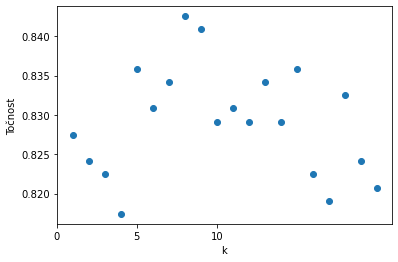

In [21]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,21)
scores = []

for k in k_range:
    knn_class = KNeighborsClassifier(n_neighbors = k)
    knn_class.fit(X_train1, y_train1)
    scores.append(knn_class.score(X_test1, y_test1))

plt.figure()
plt.xlabel('k')
plt.ylabel('Točnost')
plt.scatter(k_range, scores)
plt.xticks([0,5,10]);

In [22]:
knn_class = KNeighborsClassifier(n_neighbors = 8)

knn_class.fit(X_train1, y_train1)

print(knn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.3f}'.format(knn_class.score(X_test1, y_test1)))

[0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train1, y_train1)

print(log_reg.predict(X_test1))

print('Točnost: {:.3f}'.format(log_reg.score(X_test1, y_test1)))

[0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 

In [24]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-1.78541953e-11  4.08779783e-07 -2.10147528e-13  3.17670571e-12
   1.27330044e-11 -7.19193615e-07 -5.32357939e-11 -3.08078820e-12
   6.78183599e-13]]
[-8.51131837e-13]


In [25]:
from sklearn.neural_network import MLPClassifier

nn_class = MLPClassifier(hidden_layer_sizes = [250, 250, 250], random_state = 0, solver='lbfgs')

nn_class.fit(X_train1, y_train1)

print(nn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.2f}'.format(nn_class.score(X_test1, y_test1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
matrica_konfuzije1 = pd.crosstab(knn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije1)

matrica_konfuzije2 = pd.crosstab(log_reg.predict(X_test1), y_test1.values)
print(matrica_konfuzije2)

matrica_konfuzije3 = pd.crosstab(nn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije3)

col_0    0   1
row_0         
0      451  65
1       29  52
col_0    0   1
row_0         
0      457  87
1       23  30
col_0    0    1
row_0          
0      480  117


In [27]:
# Odaziv (osjetljivost, omjer točno pozitivnih) = TP / (TP + FN)
print('Stopa odaziva za sve klasifikatore: {:.2f}'.format(7/(7+0)))

# Preciznost = TP / (TP + FP)
print('Preciznost za kNN: {:.2f}'.format(7/(7+1)))
print('Preciznost za logističku regresiju i neuronsku mrežu:: {:.2f}'.format(7/(7+2)))

Stopa odaziva za sve klasifikatore: 1.00
Preciznost za kNN: 0.88
Preciznost za logističku regresiju i neuronsku mrežu:: 0.78


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Stopa odaziva:
print('Stopa odaziva za kNN: {:.2f}'.format(recall_score(y_test1, knn_class.predict(X_test1))))
print('Stopa odaziva za logističku regresiju i neuronsku mrežu: {:.2f}'.format(recall_score(y_test1, nn_class.predict(X_test1))))

# Preciznost
print('Preciznost za kNN: {:.2f}'.format(precision_score(y_test1, knn_class.predict(X_test1))))
print('Preciznost za logističku regresiju i neuronsku mrežu: {:.2f}'.format(precision_score(y_test1, nn_class.predict(X_test1))))

Stopa odaziva za kNN: 0.44
Stopa odaziva za logističku regresiju i neuronsku mrežu: 0.00
Preciznost za kNN: 0.64
Preciznost za logističku regresiju i neuronsku mrežu: 0.00


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
